In [1]:
import numpy as np
import matplotlib.pyplot as plt

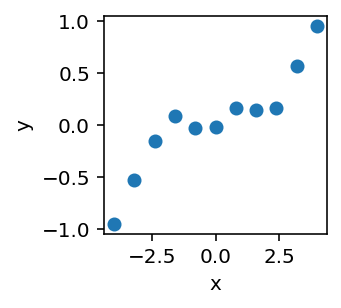

In [85]:
N = 11
x = np.linspace(-4, 4, num=N)
rng = np.random.RandomState(42)
y = x**3
y /= y.max()
y += rng.randn(N) / 10

w = 2
fig, ax = plt.subplots(figsize=(w, w))
ax.plot(x, y, "o")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.savefig("training.pdf", bbox_inches="tight")

In [82]:
x_test = np.linspace(x.min(), x.max(), num=1000)

[0.03651994021977361, 0.17217423331082238]
[0.060715681135421376, 0.0012277408415335665, -0.0037805845180699624, 0.015005836768722679]
[-0.02341369569491248, 0.19616940557628887, 0.18647383222322617, -0.13059621936826193, -0.07725149498779943, 0.02705053897306019, 0.011798856734745402, -0.0012323684517273022, -0.0007707960488773156, -5.778602269496143e-05, 1.8124249070850822e-05, 3.854061547042577e-06]


/Users/scott/anaconda3/lib/python3.7/site-packages/numpy/core/overrides.py:165: RankWarning: Polyfit may be poorly conditioned
  implementation, public_api, relevant_args, args, kwargs)


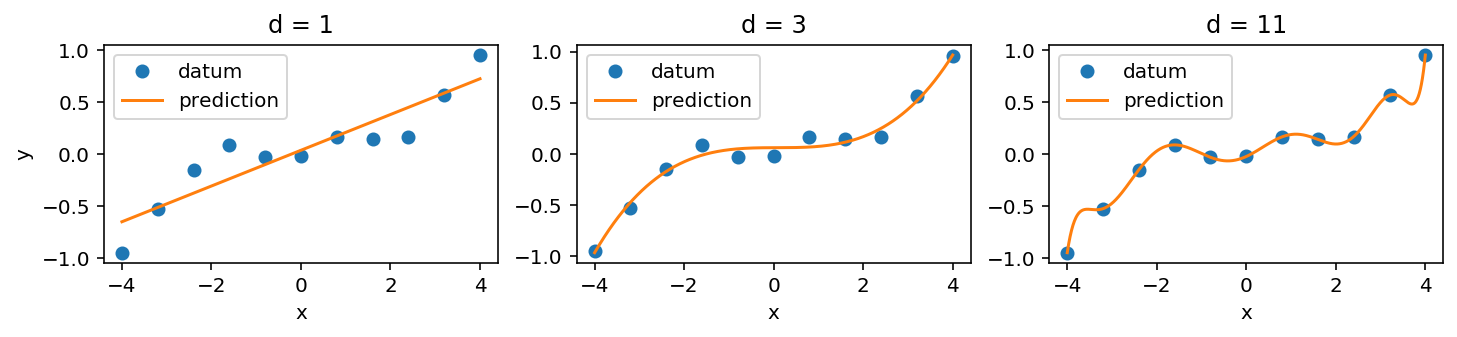

In [83]:
def fit(x_train, y_train, x_test, d=3):
    coefs = np.polyfit(x_train, y_train, d)  # highest power first
    coefs = list(reversed(coefs))  # lowest power first
    print(coefs)
    y_hat = sum(c * (x_test**p) for p, c in enumerate(coefs))
    return y_hat

w = 2
fig, axs = plt.subplots(ncols=3, figsize=(3 * 2.0 * w, w))
for d, ax in zip([1, 3, len(x)], axs):
    y_hat = fit(x, y, x_test, d=d)
    _ = ax.plot(x, y, "o", label="datum")
    assert len(x_test) == len(y_hat) == 1000
    assert x_test.ndim == y_hat.ndim == 1
    _ = ax.plot(x_test, y_hat, "C1", label="prediction")
    ax.set_title("d = {}".format(d))
    ax.legend(loc="best")
    ax.set_xlabel("x")
    if d == 1:
        ax.set_ylabel("y")
plt.savefig("polynomial.pdf", bbox_inches="tight")
plt.show()

In [86]:
!open .

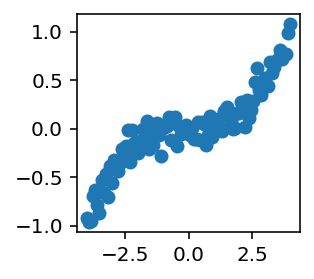

In [92]:
x = np.linspace(-x.max(), x.max(), num=100)
y = x**3
y /= y.max()
y += rng.randn(len(x)) / 10

w = 2
fig, ax = plt.subplots(figsize=(w, w))
ax.plot(x, y, "o")
plt.savefig("val.pdf", bbox_inches="tight")

In [104]:
def simulation(x):
    # ...
    return 2 * x

y = [simulation(x) for x in range(10)]

In [109]:
import dask

@dask.delayed
def simulation(x):
    # ...
    return 2 * x

y = dask.compute([simulation(x) for x in range(10)])
y

([0, 2, 4, 6, 8, 10, 12, 14, 16, 18],)